In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv('seattle.csv')

# Prédiction 
2 variables target : la consommation d'énergie du batiment(SiteEnergyUse(kBtu)) et les émissions de C02 ( TotalGHGEmissions)
3 modèles : 
+ (SiteEnergyUse(kBtu)) 
+ TotalGHGEmissions 
+ TotalGHGEmissions  avec EnergyStarScors



In [3]:
df.head()

,Unnamed: 0,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Latitude,Longitude,Address,City,State,ZipCode,Age,AllPropertyUseTypesNumber,surfacePbat,surfacePetage
0,0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,DOWNTOWN,1.0,12.0,88434,0,...,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0,88,1,88434.0,7370.0
1,1,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,DOWNTOWN,1.0,11.0,103566,15064,...,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0,19,3,103566.0,9415.0
2,4,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,DOWNTOWN,1.0,18.0,119890,12460,...,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0,35,3,119890.0,6661.0
3,5,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,DOWNTOWN,1.0,2.0,97288,37198,...,47.616439,-122.336764,810 VIRGINIA ST,SEATTLE,WA,98101.0,16,1,97288.0,48644.0
4,6,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,DOWNTOWN,1.0,11.0,83008,0,...,47.614114,-122.332741,1619 9TH AVE,SEATTLE,WA,98101.0,89,1,83008.0,7546.0


Dans un premier temps, nous allons retirer de notre jeu de données les dernières variables d'identification, cela ne va pas nous servir pour la prédiction.

In [4]:
identification = ["PropertyName","TaxParcelIdentificationNumber","Latitude",
                    "Longitude","Address","City","State","ZipCode"]

identification = df[identification]

df.drop(identification, axis=1, inplace =True)

In [5]:
df_e = df.copy()

Dans un second temps, nous allons retirer de notre dataset les relevés de consommation annuels

In [6]:
consommation = ["NaturalGas(kBtu)","Electricity(kBtu)","SteamUse(kBtu)"
                ,'Unnamed: 0','ENERGYSTARScore']

consommation = df[consommation]

df.drop(consommation, axis=1, inplace=  True)

Pour finir nous supprimons les variables de surfaces 

In [7]:
surface = ['PropertyGFABuilding(s)',"NumberofBuildings",'PropertyGFATotal']
surface = df[surface]
df.drop(surface, axis=1, inplace=True)

### Suppression des valeurs manquantes 

In [8]:
df = df.dropna()

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

BuildingType                 0.0
PrimaryPropertyType          0.0
Neighborhood                 0.0
NumberofFloors               0.0
PropertyGFAParking           0.0
SiteEnergyUse(kBtu)          0.0
TotalGHGEmissions            0.0
Age                          0.0
AllPropertyUseTypesNumber    0.0
surfacePbat                  0.0
surfacePetage                0.0
dtype: float64

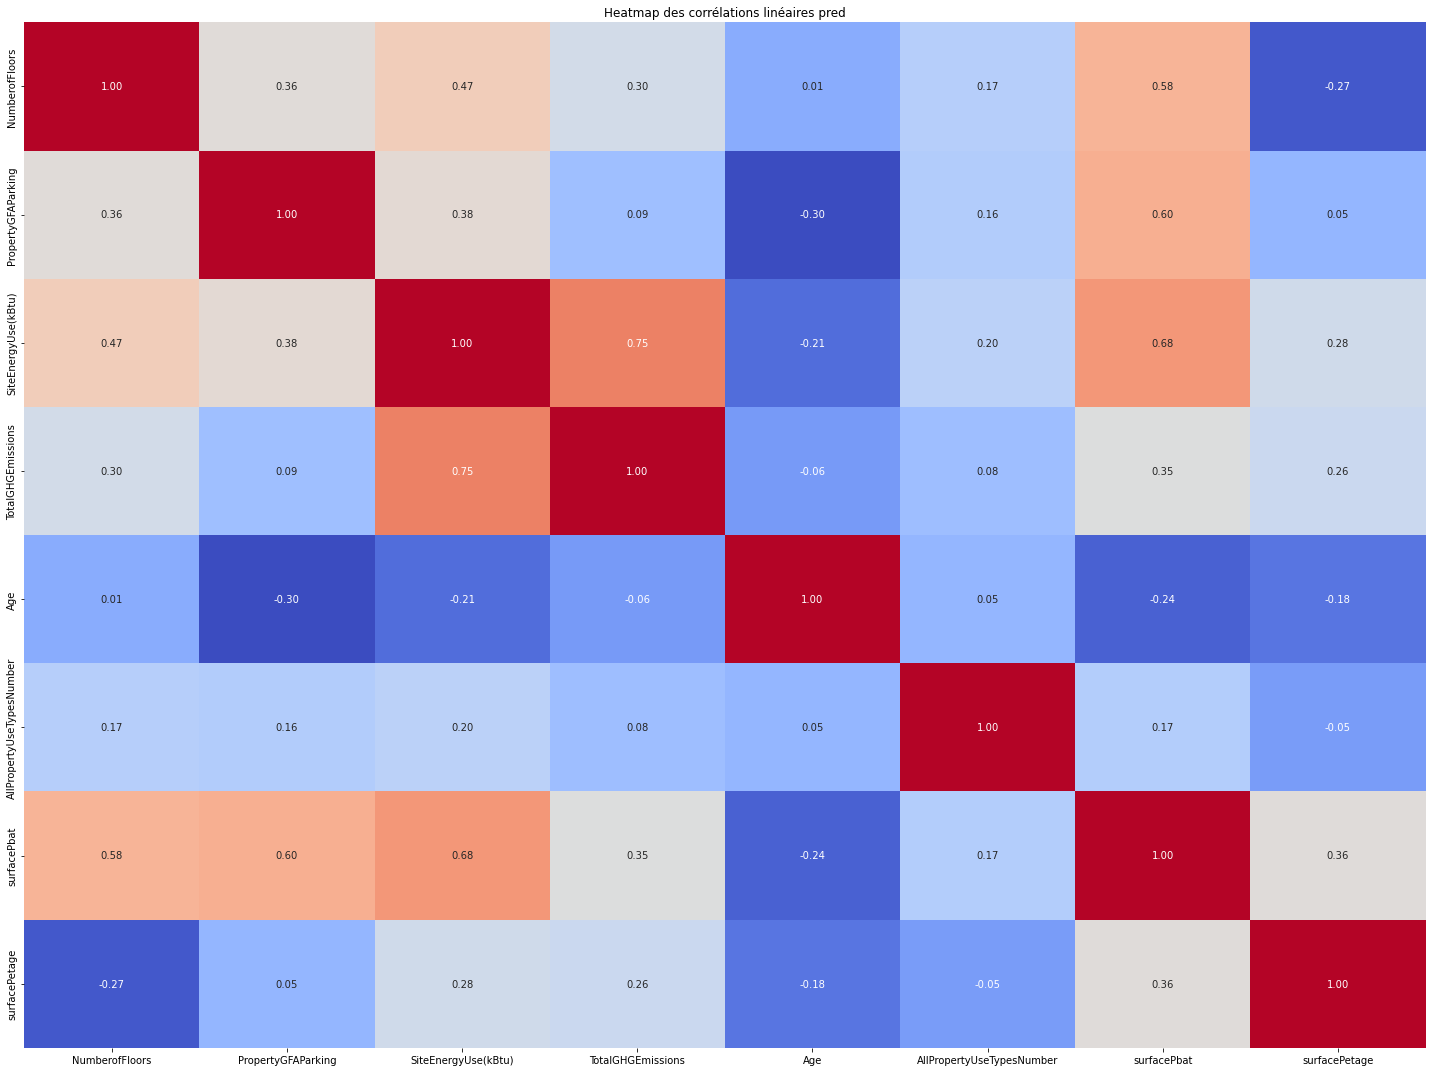

In [10]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cbar=False, fmt=".2f", cmap="coolwarm" ,ax=ax)
plt.title("Heatmap des corrélations linéaires pred")
plt.tight_layout()

In [11]:
df.describe()

,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions,Age,AllPropertyUseTypesNumber,surfacePbat,surfacePetage
count,1703.000000,1703.000000,1.703000e+03,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,3.932472,14129.144451,5.707879e+06,113.910981,52.545508,1.897240,103910.506166,36970.813858
std,4.027172,38054.071896,5.117194e+06,122.068745,33.528845,1.161216,99658.196213,37803.751912
min,1.000000,0.000000,7.273858e+05,5.100000,1.000000,1.000000,7125.000000,4932.000000
25%,1.000000,0.000000,1.910478e+06,31.400000,24.000000,1.000000,40166.000000,15505.000000
50%,3.000000,0.000000,3.740374e+06,66.300000,47.000000,2.000000,67380.000000,25019.000000
75%,5.000000,4914.000000,7.746190e+06,150.700000,86.000000,2.000000,128283.000000,46018.500000
max,42.000000,407795.000000,2.391474e+07,692.100000,116.000000,13.000000,861702.000000,411584.000000


### OneHotEncoder

Concernant nos variables qualitatives, nous allons utiliser One hot Encoder pour les intégrer aux modèles. 

In [12]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['BuildingType']])
ohe.transform(df[['BuildingType']])
transformed = ohe.transform(df['BuildingType'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df = pd.concat([df, ohe_df], axis=1).drop(['BuildingType'], axis=1)

In [13]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['Neighborhood']])
ohe.transform(df[['Neighborhood']])
transformed = ohe.transform(df['Neighborhood'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df = pd.concat([df, ohe_df], axis=1).drop(['Neighborhood'], axis=1)

In [14]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['PrimaryPropertyType']])
ohe.transform(df[['PrimaryPropertyType']])
transformed = ohe.transform(
    df['PrimaryPropertyType'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df = pd.concat([df, ohe_df], axis=1).drop(['PrimaryPropertyType'], axis=1)

### Regardons la matrice des correlations 
Supprimons les correlations trop faible de notre modèle 

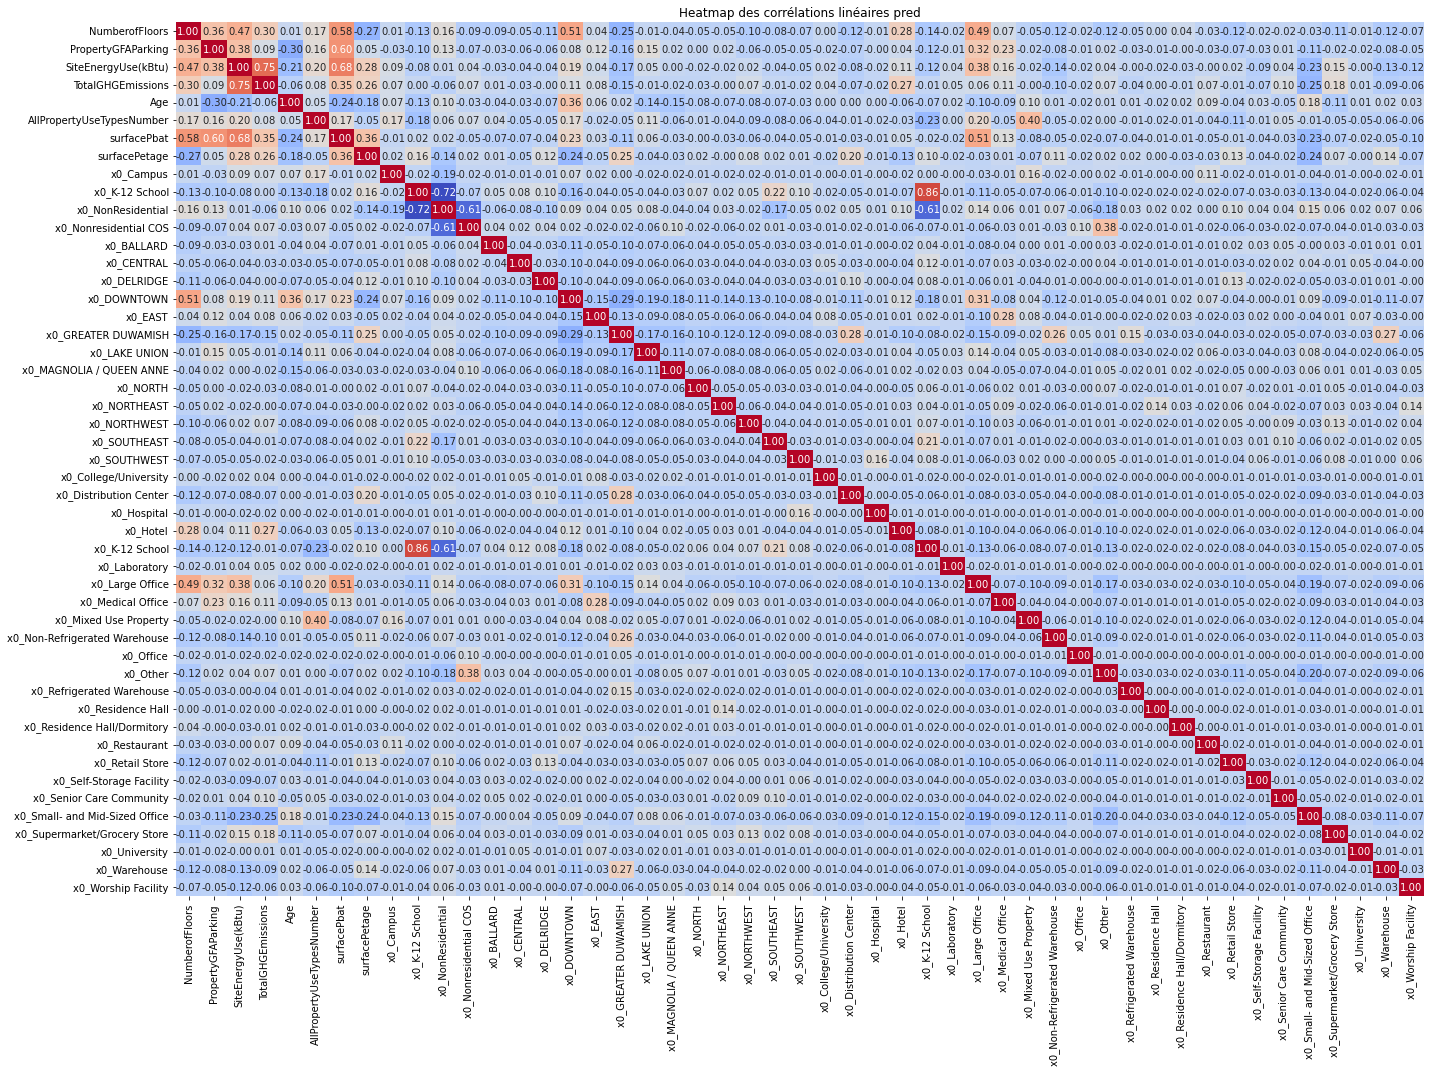

In [15]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cbar=False, fmt=".2f", cmap="coolwarm" ,ax=ax)
plt.title("Heatmap des corrélations linéaires pred")
plt.tight_layout()

In [16]:
df = df.drop(columns=["x0_Other", "x0_Office", "x0_Refrigerated Warehouse",
                          "x0_Residence Hall", "x0_Residence Hall/Dormitory",
                          "x0_Nonresidential COS", 'x0_K-12 School'])

### Importation de toutes les libraires  neccesaire aux predictions

In [17]:
#preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Metrics 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import  make_scorer
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error,mean_absolute_error



# dummy
from sklearn import dummy
from sklearn.dummy import DummyRegressor

# Machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import *
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn import svm

#processing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve


In [18]:
def echantillonage(df_X, df_y):
    '''
    Cette fonction va permettre de partionnier notre jeu de données en entrainement
    et de test avec une partion de 80/20
    '''

    X = df_X.copy()
    y = df_y.copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=314)

    return X_train, X_test, y_train, y_test

### 1 er modèle  TotalGHGEmissions

Notre modèle ne présente pas l'energystarscore en feature pour éviter un effet d'interaction et pour pouvoir le comparer par la suite, dans la même logique siteEnergyuse entant notre deuxième variable target nous le retiron des features 

In [19]:
X = df.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)']
            , axis=1)
y = df['TotalGHGEmissions']

print("Echantillonage : 80/20%")
X_train, X_test, y_train, y_test = echantillonage(
    X, y)

pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)


print('Train set:', X_train_pt.shape)
print('Test set:', X_test_pt.shape)

Echantillonage : 80/20%
Train set: (1362, 39)
Test set: (341, 39)


### Baseline

Nous créons une baseline pour permette de comparer notre modèle à un autre optimisé. 

In [20]:
lm = LinearRegression().fit(X_train, y_train)
dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)
dummy_median = DummyRegressor(strategy='median').fit(X_train, y_train)


# Prédiction sur le jeu de test
y_predict = lm.predict(X_test)
y_predict_dummy_mean = dummy_mean.predict(X_test)
y_predict_dummy_median = dummy_median.predict(X_test)


# Evaluation
print("Mean squared error (dummy): {:.2f}".format(
    mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(
    mean_squared_error(y_test, y_predict)))
print("Median absolute error (dummy): {:.2f}".format(
    median_absolute_error(y_test, y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(
    median_absolute_error(y_test, y_predict)))
print("r2_score (dummy mean): {:.2f}".format(
    r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(
    r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))
print("RMSE : {:.2f}".format(
    np.sqrt(metrics.mean_squared_error(y_test, y_predict_dummy_mean))))

Mean squared error (dummy): 14255.16
Mean squared error (linear model): 7809.08
Median absolute error (dummy): 46.30
Median absolute error (linear model): 46.95
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.13
r2_score (linear model): 0.45
RMSE : 119.39


### Initial Models

In [21]:
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    R_squared = r2_score(true,predicted)
    print(message)
    print("MSE:{:.2f}".format (MSE))
    print("MAE:{:.2f}".format (MAE))
    print("RMSE:{:.2f}".format (RMSE))
    print("R2: {:.2f}".format (R_squared))

Nous allons tester plusieurs modèles pour notre prediction 

In [22]:
LinearReg = LinearRegression().fit(X_train_pt, y_train)
ridge = Ridge().fit(X_train_pt, y_train)
lasso = Lasso().fit(X_train_pt, y_train)
elastic_net = ElasticNet().fit(X_train_pt, y_train)
XGB = xgb.XGBRegressor().fit(X_train_pt,y_train)
random_forest = RandomForestRegressor().fit(X_train_pt, y_train)
SVM = svm.SVR().fit(X_train_pt, y_train) 
adaboost = AdaBoostRegressor().fit(X_train_pt, y_train)

In [23]:
print("Linear Regression") 
predicted_train_y = LinearReg.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = LinearReg.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

print('Ridge')
predicted_y_train = ridge.predict(X_train_pt)
evaluateRegressor(y_train,predicted_y_train," Training Set")
predicted_y_test = ridge.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test, " Test Set")
print("\n")

print('Lasso')
predicted_y_train = lasso.predict(X_train_pt)
evaluateRegressor(y_train,predicted_y_train," Training Set")
predicted_y_test = lasso.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test, " Test Set")
print("\n")

print('elasticNet')
predicted_y_train =  elastic_net.predict(X_train_pt)
evaluateRegressor(y_train,predicted_y_train," Training Set")
predicted_y_test = elastic_net.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test, " Test Set")
print("\n")

print("XGBRegressor")
predicted_y_train =  XGB.predict(X_train_pt)
evaluateRegressor(y_train,predicted_y_train," Training Set")
predicted_y_test = XGB.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test, " Test Set")
print("\n")

print("Random Forest Regressor") 
predicted_train_y = random_forest.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = random_forest.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")
    
print("Support Vector Machine") 
predicted_train_y = SVM.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = SVM.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

print("AdaBoost") 
predicted_train_y = adaboost.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = adaboost.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")


Linear Regression
    Training Set
MSE:9713.84
MAE:69.85
RMSE:98.56
R2: 0.35
    Test Set
MSE:9110.95
MAE:67.89
RMSE:95.45
R2: 0.36


Ridge
 Training Set
MSE:9713.92
MAE:69.84
RMSE:98.56
R2: 0.35
 Test Set
MSE:9110.66
MAE:67.88
RMSE:95.45
R2: 0.36


Lasso
 Training Set
MSE:9762.75
MAE:70.01
RMSE:98.81
R2: 0.35
 Test Set
MSE:9118.89
MAE:67.76
RMSE:95.49
R2: 0.36


elasticNet
 Training Set
MSE:10376.23
MAE:72.39
RMSE:101.86
R2: 0.31
 Test Set
MSE:9626.36
MAE:70.01
RMSE:98.11
R2: 0.32


XGBRegressor
 Training Set
MSE:187.54
MAE:9.36
RMSE:13.69
R2: 0.99
 Test Set
MSE:3664.62
MAE:39.38
RMSE:60.54
R2: 0.74


Random Forest Regressor
    Training Set
MSE:820.75
MAE:17.80
RMSE:28.65
R2: 0.95
    Test Set
MSE:3704.46
MAE:41.05
RMSE:60.86
R2: 0.74


Support Vector Machine
    Training Set
MSE:15716.39
MAE:75.28
RMSE:125.37
R2: -0.04
    Test Set
MSE:14523.24
MAE:74.05
RMSE:120.51
R2: -0.02


AdaBoost
    Training Set
MSE:12296.14
MAE:94.62
RMSE:110.89
R2: 0.18
    Test Set
MSE:13038.07
MAE:96.39


In [24]:
df_pred = {'modele': ['Linear Reg','Ridge', 'Lasso', 'elasticNet', 
                       'XGBRegressor', 'Random Forest', 
                       'SVM', 'AdaBoost'],
           'RMSE': [96.47,96.23,95.44,97.73,65.79,66.63,119.15,112.35],
           'R2': [0.34,0.34,0.35,0.32,0.69,0.68,0,0.10]}
           
df_pred = pd.DataFrame(df_pred, columns=['modele','RMSE','R2'])
df_pred = df_pred.set_index('modele')
df_pred_RMSE = df_pred['RMSE'].sort_values(ascending=True)
df_pred_RMSE = df_pred_RMSE.reset_index()
df_pred_R2 = df_pred['R2'].sort_values(ascending=False)
df_pred_R2 = df_pred_R2.reset_index()

Text(0.5, 1.0, 'Distribution score R2 des différents modèles sur le test set.')

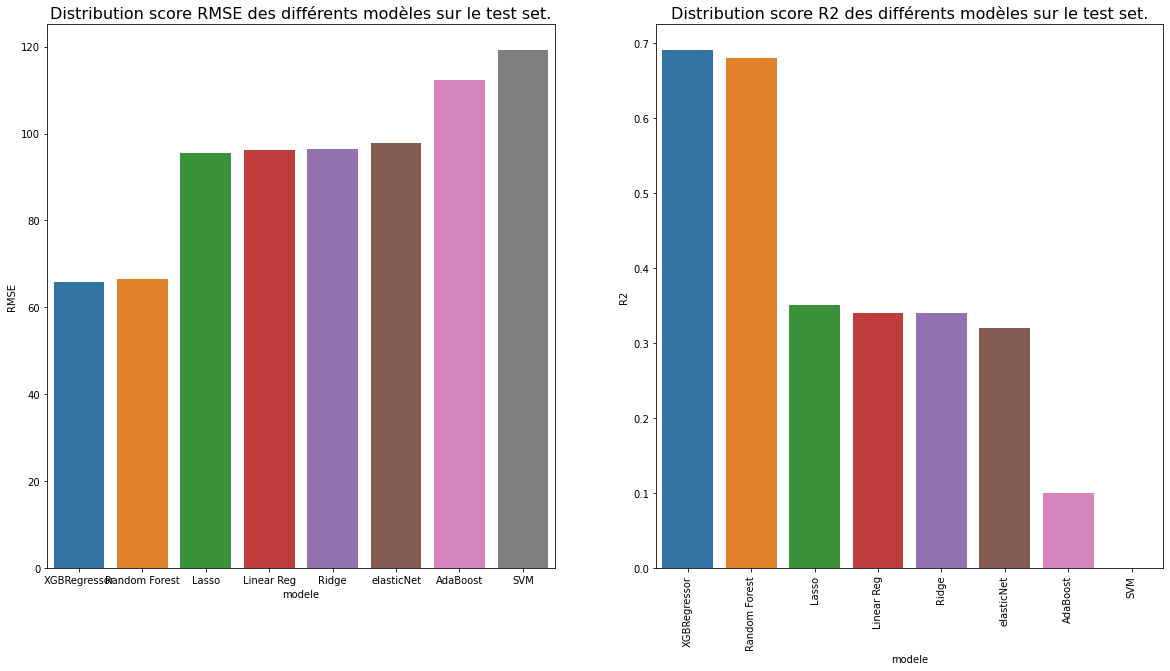

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,
                         figsize=(20, 10))
fig.patch.set_alpha(0.7)
sns.barplot(data =df_pred_RMSE, x = df_pred_RMSE['modele'], y = df_pred_RMSE['RMSE'], ax=axes[0])
axes[0].set_title(
    "Distribution score RMSE des différents modèles sur le test set.", size=16)
plt.xticks(rotation=90)
sns.barplot(data = df_pred_R2, x= df_pred_R2['modele'], y= df_pred_R2['R2'],ax=axes[1])
axes[1].set_title(
    "Distribution score R2 des différents modèles sur le test set.", size=16)

Les deux meilleurs modèles sont le xgbr regressor et le randomon forest regressor aussi bien au niveau du R2 score que du RMSE 

Nous allons prendre les 4 meilleurs modèles et faire un gridserchCV pour essayer d'améliorer notre score. 
+ Random Forest Regressor
+ XGBRegressor
+ Lasso
+ ridge

In [26]:
#  Ridge
params= {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "fit_intercept" : [True, False]}


grid = GridSearchCV(estimator=ridge, param_grid=params,cv=5, scoring= 'r2', 
                    verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_pt, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print('Best estimator: ', grid_result.best_estimator_)
 
model_ridge = grid_result.best_estimator_

# Test sur le jeux de test 


predicted_train_y = model_ridge.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = model_ridge.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.2960072640832503
Best Params:  {'alpha': 100, 'fit_intercept': True}
Best estimator:  Ridge(alpha=100)
    Training Set
MSE:9758.15
MAE:69.81
RMSE:98.78
R2: 0.35
    Test Set
MSE:9092.21
MAE:67.69
RMSE:95.35
R2: 0.36


In [27]:
#Lasso
params= {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=lasso, param_grid=params, cv=5, scoring='r2', 
                    verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_pt, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print('Best estimator: ', grid_result.best_estimator_)


model_lasso = grid_result.best_estimator_


# Test sur le jeux de test 


predicted_train_y = model_lasso.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = model_lasso.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.29727432418070154
Best Params:  {'alpha': 1}
Best estimator:  Lasso(alpha=1)
    Training Set
MSE:9762.75
MAE:70.01
RMSE:98.81
R2: 0.35
    Test Set
MSE:9118.89
MAE:67.76
RMSE:95.49
R2: 0.36


/Users/vincentMalfroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.458e+05, tolerance: 1.672e+03
  model = cd_fast.enet_coordinate_descent(
/Users/vincentMalfroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.891e+04, tolerance: 1.666e+03
  model = cd_fast.enet_coordinate_descent(
/Users/vincentMalfroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

In [28]:
#XGBRegressor
params= {"alpha": [0.001, 0.1, 1],
         "lambda": [0.01, 0.1, 1],
        "eta": [0.01, 0.015, 0.025, 0.05, 0.1]}

grid = GridSearchCV(estimator=XGB, param_grid=params, cv=5,
                    scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_pt, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print('Best estimator: ', grid_result.best_estimator_)

model_xgb = grid_result.best_estimator_

# Test sur le jeux de test 

predicted_train_y = model_xgb.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = model_xgb.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Score:  0.5425104576795163
Best Params:  {'alpha': 0.001, 'eta': 0.01, 'lambda': 0.01}
Best estimator:  XGBRegressor(alpha=0.001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=0.01, learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, ...)
    Training Set
MSE:187.54
MAE:9.36
RMSE:13.69
R2: 0.99
    Test Set
MSE:3664.62
MAE:39.38
RMSE:60.54
R2: 0.74


In [29]:
#Random Forest Regressor

params_new = {'max_depth': [10,15,20,25,30],
             'n_estimators': [200, 400, 600,1000,1200,1400],
             'max_features': ['log2', 'sqrt', 'None']}


gs_new = GridSearchCV(estimator=RandomForestRegressor()
                      , param_grid=params_new,cv=5, n_jobs=-1)
gs_new.fit(X_train_pt, y_train)
print('Best Score: ', gs_new.best_score_)
print('Best Params: ', gs_new.best_params_)
print('Best estimator: ', gs_new.best_estimator_)


model_forest = gs_new.best_estimator_

predicted_train_y = model_forest.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = model_forest.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")

Best Score:  0.5760732435009296
Best Params:  {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1400}
Best estimator:  RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1400)
    Training Set
MSE:828.91
MAE:17.96
RMSE:28.79
R2: 0.94
    Test Set
MSE:3577.48
MAE:41.10
RMSE:59.81
R2: 0.75


Au vu des résultats et de l'optimisation de nos paramètres, le model forest sort en première position de très proches du XGB regressor notamment si nous regardons le R2 et le RMSE
Ici, le modèle décrit 75% des variations de l'usage de l'energie
Si nous comparons ce modèle à celui de la baseline 0.37, nous pouvons voir que le score, c'est fortement amélioré 

In [30]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve

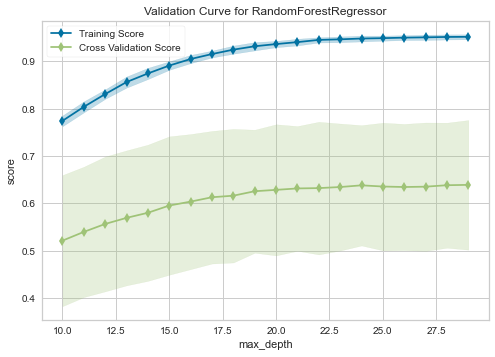

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [31]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(10, 30), cv=10, scoring="r2")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

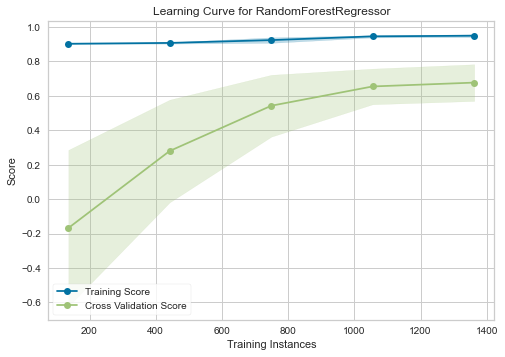

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [32]:
model = model_forest
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)       
visualizer.show()  

### Variables importantes

In [33]:
from yellowbrick.model_selection import FeatureImportances

In [34]:
feature_importances_co2 = pd.DataFrame(model_forest.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [35]:
feature_importances_co2

,importance
surfacePbat,0.202299
surfacePetage,0.155740
NumberofFloors,0.116265
Age,0.110854
PropertyGFAParking,0.060064
x0_Hotel,0.040713
AllPropertyUseTypesNumber,0.039847
x0_Supermarket/Grocery Store,0.028128
x0_Small- and Mid-Sized Office,0.024227
x0_Large Office,0.020822


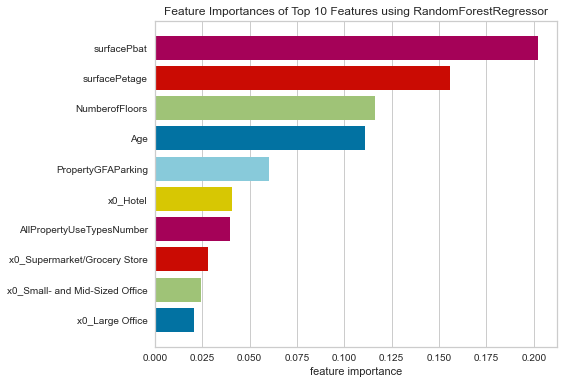

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [36]:
model = model_forest
viz = FeatureImportances(model,relative=False,topn=10)
viz.fit(X, y)
viz.show()

Nous pouvons voir que les variables les plus importantes du modèles sont le nombre d'etage et la surface total du batiment 

### Deuxième modèle  : SiteEnergyUse(kBtu)

In [37]:
X = df.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)']
            , axis=1)
y = df['SiteEnergyUse(kBtu)']

print("Echantillonage : 80/20%")
X_train, X_test, y_train, y_test = echantillonage(
    X, y)

pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)





print('Train set:', X_train_pt.shape)
print('Test set:', X_test_pt.shape)

Echantillonage : 80/20%
Train set: (1362, 39)
Test set: (341, 39)


In [38]:
lm = LinearRegression().fit(X_train, y_train)
dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)
dummy_median = DummyRegressor(strategy='median').fit(X_train, y_train)


# Prédiction sur le jeu de test
y_predict = lm.predict(X_test)
y_predict_dummy_mean = dummy_mean.predict(X_test)
y_predict_dummy_median = dummy_median.predict(X_test)


# Evaluation
print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(
    mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(
    mean_squared_error(y_test, y_predict)))
print("Median absolute error (dummy): {:.2f}".format(
    median_absolute_error(y_test, y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(
    median_absolute_error(y_test, y_predict)))
print("r2_score (dummy mean): {:.2f}".format(
    r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(
    r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))
print("RMSE : {:.2f}".format(
    np.sqrt(metrics.mean_squared_error(y_test, y_predict_dummy_mean))))

Linear model, coefficients:  [ 2.52307648e+05 -1.06660715e+01 -7.41830700e+03  4.14091064e+05
  2.32437851e+01  2.55798588e+01  5.90913001e+06  4.84844642e+05
  2.21156181e+05  2.04616005e+05 -2.53207111e+05  3.63585453e+05
  1.85707349e+05 -1.76823485e+05  6.89463677e+05  6.03443797e+05
 -8.76669802e+05 -1.61051336e+05  4.73801324e+05 -6.05532263e+05
 -6.68489789e+05  2.67259803e+06 -2.43500386e+06 -1.06987368e+06
  7.47584019e+05  5.60132892e+06  1.39941081e+04  2.62754160e+06
 -7.09225232e+05 -2.60096520e+06  7.54028521e+05  1.71412094e+05
 -3.01484287e+06  2.64153310e+06 -1.27800363e+06  5.93787634e+06
  6.93006399e+05 -2.83486912e+06 -1.80816922e+06]
Mean squared error (dummy): 28025803791321.73
Mean squared error (linear model): 10394980715154.66
Median absolute error (dummy): 2251387.25
Median absolute error (linear model): 1524794.70
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.13
r2_score (linear model): 0.63
RMSE : 5293940.29


Nous avons conclu que le meilleur modèle pour notre première prédiction (C02) était le random forest, de ce fait, nous reprenons seulement ce modèle pour notre deuxième prédiction.

In [39]:
# Random Forest Regressor

params_new = {'max_depth': [10, 15, 20, 25, 30, None],
              'n_estimators': [200, 400, 600],
              'max_features': ['log2', 'sqrt', 'None']}


gs_new = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=params_new,cv=5, n_jobs=-1)
gs_new.fit(X_train_pt, y_train)
print('Best Score: ', gs_new.best_score_)
print('Best Params: ', gs_new.best_params_)
print('Best estimator: ', gs_new.best_estimator_)

# Réalisation d'une cross validation sur les meilleurs parametres
model_forest_energy = gs_new.best_estimator_

# Test sur le jeux de test

predicted_train_y = model_forest_energy.predict(X_train_pt)
evaluateRegressor(y_train, predicted_train_y, "    Training Set")
predicted_y_test = model_forest_energy.predict(X_test_pt)
evaluateRegressor(y_test, predicted_y_test, "    Test Set")

Best Score:  0.7300523944545707
Best Params:  {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 600}
Best estimator:  RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=600)
    Training Set
MSE:820589211986.25
MAE:584897.46
RMSE:905863.79
R2: 0.97
    Test Set
MSE:5570856050191.94
MAE:1527732.76
RMSE:2360266.10
R2: 0.80


Ici, le modèle décrit 81% des variations de l'usage de l'energie
Nous avons amélioré notre score de prédiction par rapport à notre modèle de baseline 0.62

### Visualisation de l'optimisation du modèle 

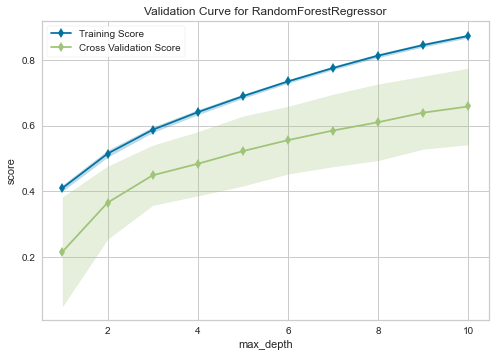

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [40]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

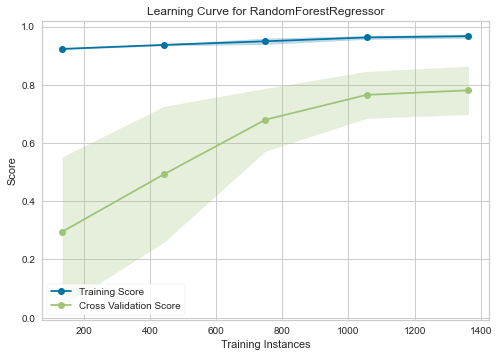

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [41]:
model = model_forest_energy
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)       
visualizer.show()  

### Variables importante

In [42]:
feature_importances = pd.DataFrame(model_forest_energy.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [43]:
feature_importances

,importance
surfacePbat,0.301762
surfacePetage,0.128200
NumberofFloors,0.116803
Age,0.085262
PropertyGFAParking,0.081175
x0_Large Office,0.045157
AllPropertyUseTypesNumber,0.035292
x0_Supermarket/Grocery Store,0.023903
x0_DOWNTOWN,0.019168
x0_GREATER DUWAMISH,0.014105


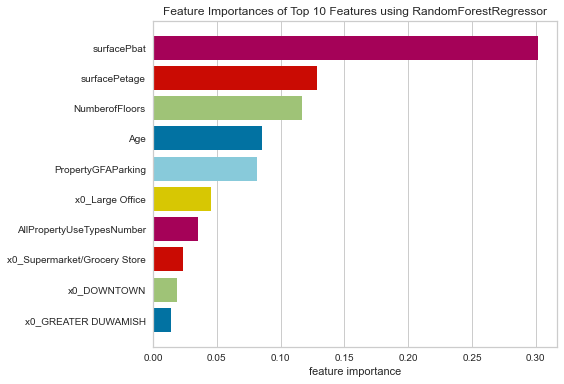

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [44]:
model = model_forest_energy
viz = FeatureImportances(model,relative=False,topn=10)
viz.fit(X, y)
viz.show()

In [45]:
feature_importances.columns = ['importance_energie']
feature_importances = feature_importances.iloc[0:5]

In [46]:
feature_importances_co2.columns = ["importance_co2"]
feature_importances_co2 = feature_importances_co2.iloc[0:5]

In [47]:
feature_importances["importance_co2"] = feature_importances_co2

In [48]:
feature_importances

,importance_energie,importance_co2
surfacePbat,0.301762,0.202299
surfacePetage,0.128200,0.155740
NumberofFloors,0.116803,0.116265
Age,0.085262,0.110854
PropertyGFAParking,0.081175,0.060064


## Impact de l'energyStarScore

In [49]:
consommation = ["NaturalGas(kBtu)","Electricity(kBtu)","SteamUse(kBtu)"
                ,'Unnamed: 0']

consommation = df_e[consommation]

df_e.drop(consommation, axis=1, inplace=  True)

In [50]:
surface = ["NumberofBuildings", "PropertyGFABuilding(s)",'PropertyGFATotal']

surface = df_e[surface]
df_e.drop(surface,axis=1, inplace=True)

In [51]:
df_e = df_e.dropna()
(df_e.isna().sum()/df_e.shape[0]).sort_values(ascending=True)

BuildingType                 0.0
PrimaryPropertyType          0.0
Neighborhood                 0.0
NumberofFloors               0.0
PropertyGFAParking           0.0
ENERGYSTARScore              0.0
SiteEnergyUse(kBtu)          0.0
TotalGHGEmissions            0.0
Age                          0.0
AllPropertyUseTypesNumber    0.0
surfacePbat                  0.0
surfacePetage                0.0
dtype: float64

In [52]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse=False)
ohe.fit(df_e[['BuildingType']])
ohe.transform(df_e[['BuildingType']])
transformed = ohe.transform(df_e['BuildingType'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df_e = pd.concat([df_e, ohe_df], axis=1).drop(['BuildingType'], axis=1)

ohe = OneHotEncoder(sparse=False)
ohe.fit(df_e[['Neighborhood']])
ohe.transform(df_e[['Neighborhood']])
transformed = ohe.transform(df_e['Neighborhood'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df_e = pd.concat([df_e, ohe_df], axis=1).drop(['Neighborhood'], axis=1)

ohe = OneHotEncoder(sparse=False)
ohe.fit(df_e[['PrimaryPropertyType']])
ohe.transform(df_e[['PrimaryPropertyType']])
transformed = ohe.transform(
    df_e['PrimaryPropertyType'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
df_e = pd.concat([df_e, ohe_df], axis=1).drop(['PrimaryPropertyType'], axis=1)

In [53]:
df_e = df_e.dropna()
(df_e.isna().sum()/df_e.shape[0]).sort_values(ascending=True)

NumberofFloors                    0.0
x0_SOUTHWEST                      0.0
x0_nan                            0.0
x0_Distribution Center            0.0
x0_Hospital                       0.0
x0_Hotel                          0.0
x0_K-12 School                    0.0
x0_Large Office                   0.0
x0_Medical Office                 0.0
x0_Mixed Use Property             0.0
x0_SOUTHEAST                      0.0
x0_Non-Refrigerated Warehouse     0.0
x0_Other                          0.0
x0_Refrigerated Warehouse         0.0
x0_Residence Hall                 0.0
x0_Residence Hall/Dormitory       0.0
x0_Retail Store                   0.0
x0_Senior Care Community          0.0
x0_Small- and Mid-Sized Office    0.0
x0_Supermarket/Grocery Store      0.0
x0_Warehouse                      0.0
x0_Office                         0.0
x0_Worship Facility               0.0
x0_NORTHWEST                      0.0
x0_NORTH                          0.0
PropertyGFAParking                0.0
ENERGYSTARSc

Nous allons retirer les correlations très faibles des variables 

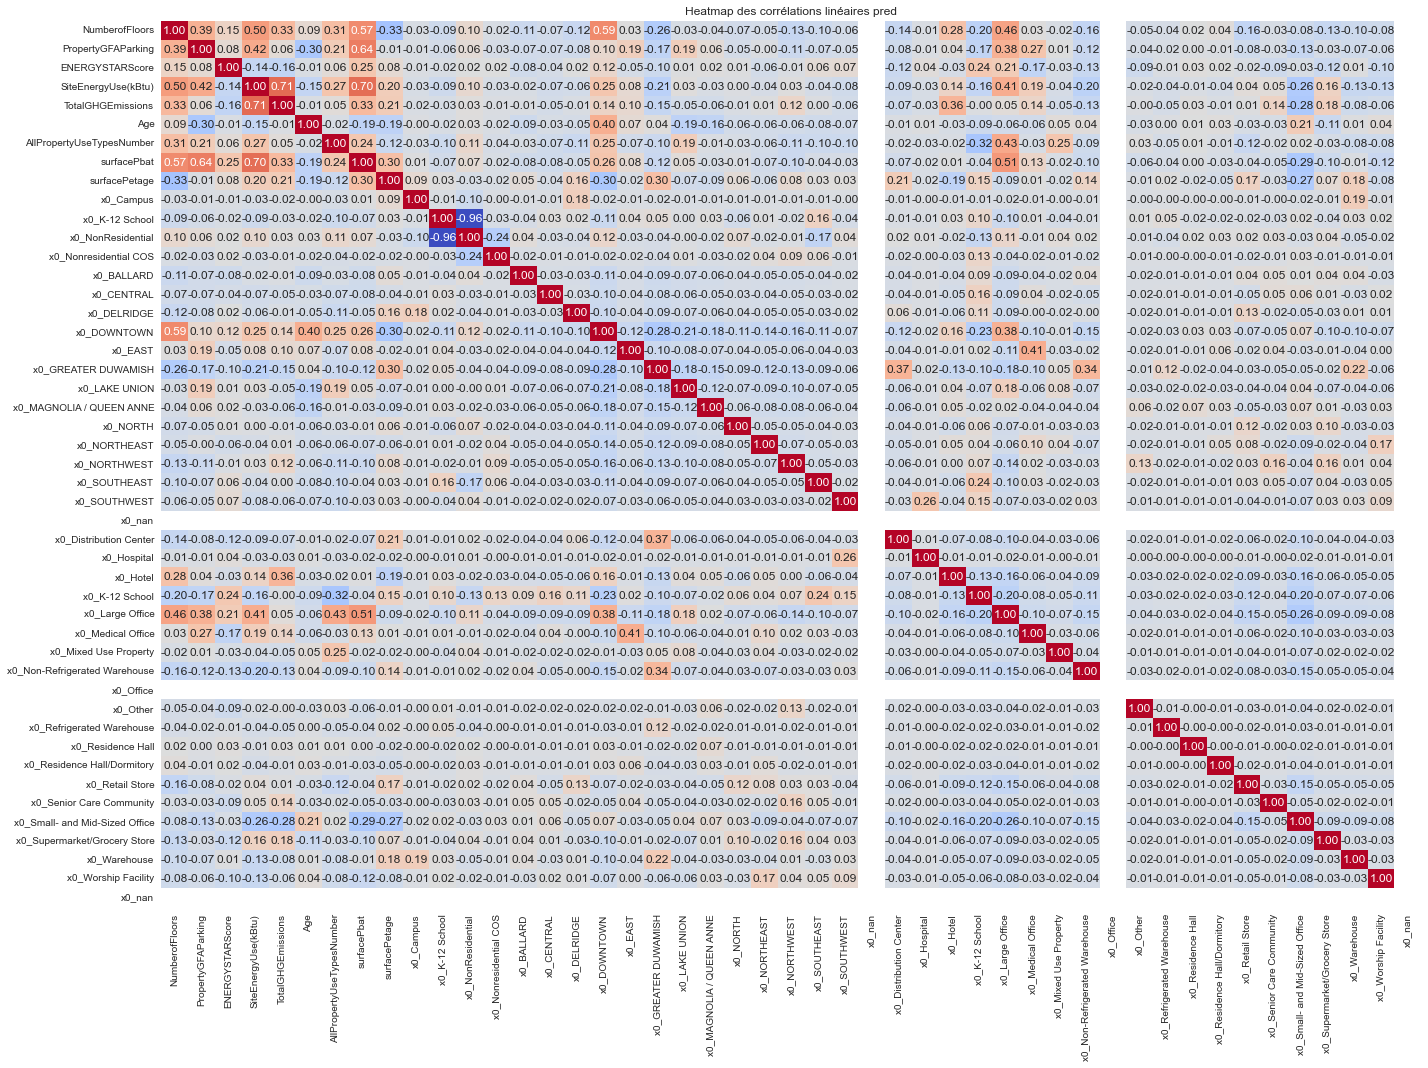

In [54]:
correlation = df_e.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cbar=False, fmt=".2f", cmap="coolwarm" ,ax=ax)
plt.title("Heatmap des corrélations linéaires pred")
plt.tight_layout()

In [55]:
df_e = df_e.drop(columns=["x0_Other", "x0_Office", "x0_Refrigerated Warehouse",
                          "x0_Residence Hall", "x0_Residence Hall/Dormitory",
                          "x0_Nonresidential COS", 'x0_K-12 School','x0_nan'])

In [56]:
df_e.describe()

,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Age,AllPropertyUseTypesNumber,surfacePbat,surfacePetage,x0_Campus,...,x0_Large Office,x0_Medical Office,x0_Mixed Use Property,x0_Non-Refrigerated Warehouse,x0_Retail Store,x0_Senior Care Community,x0_Small- and Mid-Sized Office,x0_Supermarket/Grocery Store,x0_Warehouse,x0_Worship Facility
count,912.000000,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,4.592105,16849.946272,65.894737,6.152979e+06,119.904057,48.928728,1.730263,121475.168860,39926.935307,0.001096,...,0.205044,0.037281,0.016447,0.075658,0.080044,0.008772,0.205044,0.029605,0.028509,0.024123
std,4.743042,39768.978171,26.995830,5.104695e+06,124.187937,32.650267,0.897395,103351.496569,39131.377844,0.033113,...,0.403955,0.189553,0.127258,0.264595,0.271510,0.093298,0.403955,0.169589,0.166513,0.153515
min,1.000000,0.000000,1.000000,7.310920e+05,5.100000,1.000000,1.000000,17015.000000,4932.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,51.000000,2.196812e+06,33.800000,20.000000,1.000000,53188.000000,17167.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,74.000000,4.622402e+06,69.400000,44.000000,2.000000,88231.000000,26272.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,15224.750000,88.000000,8.375509e+06,163.925000,67.000000,2.000000,154648.000000,48844.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,407795.000000,100.000000,2.361282e+07,691.300000,116.000000,6.000000,861702.000000,411584.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
X = df_e.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)']
            , axis=1)
y = df_e['TotalGHGEmissions']

X = X[X['ENERGYSTARScore'].isnull()==False]
y = y[y.index.isin(list(X.index))]


print("Echantillonage : 80/20%")
X_train, X_test, y_train, y_test = echantillonage(X, y)



pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)


print('Train set:', X_train_pt.shape)
print('Test set:', X_test_pt.shape)

Echantillonage : 80/20%
Train set: (729, 35)
Test set: (183, 35)


<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Density'>

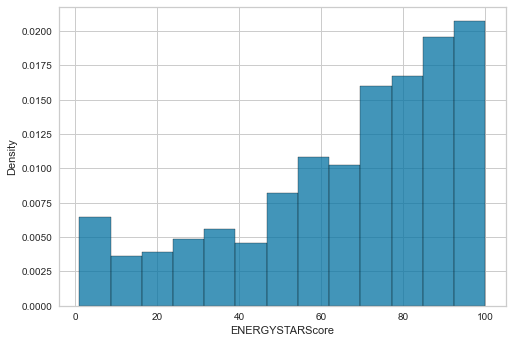

In [58]:
sns.histplot(data=X, x='ENERGYSTARScore', stat="density")

In [61]:
random_forest = RandomForestRegressor().fit(X_train_pt, y_train)

In [62]:
print("Random Forest Regressor") 
predicted_train_y = random_forest.predict(X_train_pt)
evaluateRegressor(y_train,predicted_train_y,"    Training Set")
predicted_y_test = random_forest.predict(X_test_pt)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

Random Forest Regressor
    Training Set
MSE:1058.59
MAE:22.27
RMSE:32.54
R2: 0.93
    Test Set
MSE:9900.35
MAE:66.66
RMSE:99.50
R2: 0.35




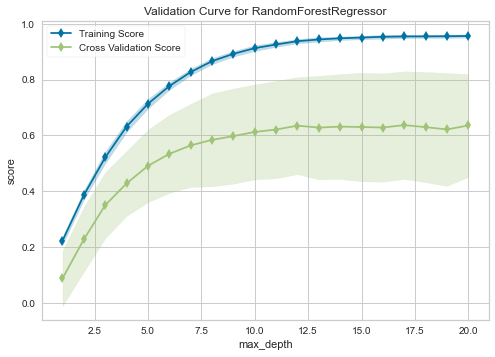

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [63]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 21), cv=10, scoring="r2")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

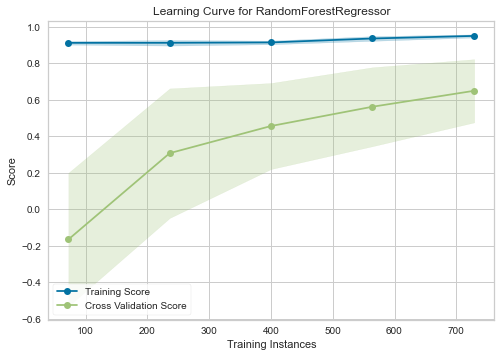

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [64]:
model = random_forest
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)       
visualizer.show()  

In [70]:
# Random Forest Regressor

params_new = {'max_depth': [10, 15,16,17,18,19,20,21,22],
              'n_estimators': [400, 600,700,800,900,1000],
              'max_features': ['log2', 'sqrt', 'None']}


gs_new = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=params_new,cv=5, n_jobs=-1)
gs_new.fit(X_train_pt, y_train)
print('Best Score: ', gs_new.best_score_)
print('Best Params: ', gs_new.best_params_)
print('Best estimator: ', gs_new.best_estimator_)

# Réalisation d'une cross validation sur les meilleurs parametres
model_forest_ENERGYSTARScore = gs_new.best_estimator_

# Test sur le jeux de test

predicted_train_y = model_forest_ENERGYSTARScore.predict(X_train_pt)
evaluateRegressor(y_train, predicted_train_y, "    Training Set")
predicted_y_test = model_forest_ENERGYSTARScore.predict(X_test_pt)
evaluateRegressor(y_test, predicted_y_test, "    Test Set")

Best Score:  0.4801532527602633
Best Params:  {'max_depth': 19, 'max_features': 'log2', 'n_estimators': 600}
Best estimator:  RandomForestRegressor(max_depth=19, max_features='log2', n_estimators=600)
    Training Set
MSE:1292.11
MAE:25.60
RMSE:35.95
R2: 0.92
    Test Set
MSE:8807.38
MAE:63.37
RMSE:93.85
R2: 0.42


Ici notre modèle décrit 41% des usages de C02 par les batiments de Seattle 

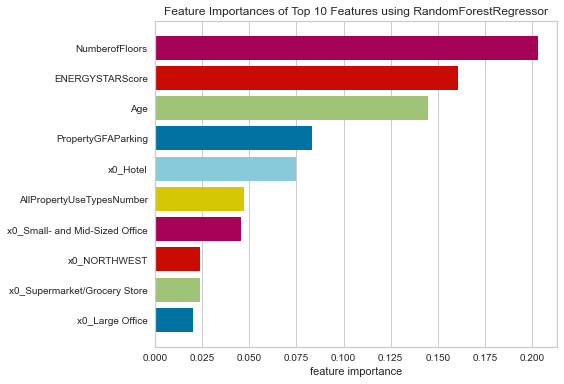

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [71]:
model = model_forest_ENERGYSTARScore
viz = FeatureImportances(model,relative=False,topn=10)
viz.fit(X, y)
viz.show()

In [72]:
feature_importances_starscore= pd.DataFrame(model_forest_ENERGYSTARScore.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [73]:
feature_importances_starscore

,importance
NumberofFloors,0.203135
ENERGYSTARScore,0.160439
Age,0.144638
PropertyGFAParking,0.083204
x0_Hotel,0.074568
AllPropertyUseTypesNumber,0.047239
x0_Small- and Mid-Sized Office,0.045691
x0_NORTHWEST,0.024121
x0_Supermarket/Grocery Store,0.023940
x0_Large Office,0.019975


En ajoutant l'energiestarscore à nos features, le R2 ne s'est pas amélioré voir a décroisse 0.70 sans et 0.41 avec, mais nous remarquons que l'energystarscore est une des features les plus importantes du modèle. Le problème du faible score que nous avons là est que cette variable est peu renseignée et de ce fait notre jeu de données comportent peu d'observations.